In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.cifar10.load_data()

In [3]:
trainX.shape

(50000, 32, 32, 3)

In [4]:
trainy.shape

(50000, 1)

In [5]:
trainX[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

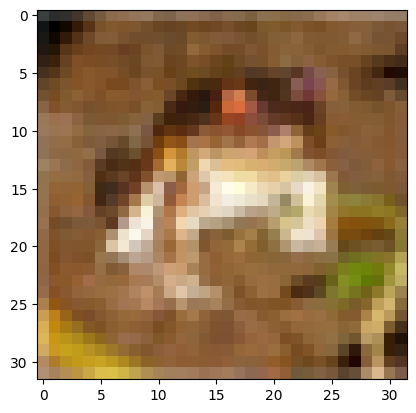

In [6]:
plt.imshow(trainX[0])

In [7]:
train_images = trainX/255
test_images = testX/255

In [8]:
dataset_images = tf.data.Dataset.from_tensor_slices(train_images)

In [9]:
dataset_images

<TensorSliceDataset shapes: (32, 32, 3), types: tf.float64>

In [10]:
dataset_labels = tf.data.Dataset.from_tensor_slices(trainy)

In [11]:
dataset_labels

<TensorSliceDataset shapes: (1,), types: tf.uint8>

In [12]:
dataset = tf.data.Dataset.zip((dataset_images, dataset_labels))

In [13]:
dataset

<ZipDataset shapes: ((32, 32, 3), (1,)), types: (tf.float64, tf.uint8)>

In [14]:
batch_size = 256
dataset = dataset.shuffle(train_images.shape[0]).repeat().batch(batch_size)

# L1, L2 test

In [15]:
model_dense_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model_dense_0.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
steps_per_epoch = train_images.shape[0]/batch_size

In [18]:
history_dense_0 = model_dense_0.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 2s 9ms/step - loss: 1.9885 - accuracy: 0.2770
Epoch 2/20
196/195 [==============================] - 2s 10ms/step - loss: 1.7977 - accuracy: 0.3597
Epoch 3/20
196/195 [==============================] - 2s 11ms/step - loss: 1.7060 - accuracy: 0.3923
Epoch 4/20
196/195 [==============================] - 2s 11ms/step - loss: 1.6514 - accuracy: 0.4106
Epoch 5/20
196/195 [==============================] - 2s 11ms/step - loss: 1.6005 - accuracy: 0.4291
Epoch 6/20
196/195 [==============================] - 2s 11ms/step - loss: 1.5739 - accuracy: 0.4406
Epoch 7/20
196/195 [==============================] - 2s 12ms/step - loss: 1.5394 - accuracy: 0.4535
Epoch 8/20
196/195 [==============================] - 2s 12ms/step - loss: 1.5229 - accuracy: 0.4574
Epoch 9/20
196/195 [==============================] - 2s 12ms/step - loss: 1.4810 - accuracy: 0.4716
Epoch 10/20
196/195 [==============================] - 2s 12ms/step - loss: 1.4780 - accurac

In [19]:
print(history_dense_0.history.keys())

dict_keys(['loss', 'accuracy'])


In [20]:
model_dense_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l1(l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
model_dense_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [22]:
history_dense_1 = model_dense_1.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 3s 14ms/step - loss: 13.4019 - accuracy: 0.1204
Epoch 2/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7650 - accuracy: 0.0992
Epoch 3/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7436 - accuracy: 0.0984
Epoch 4/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7442 - accuracy: 0.0987
Epoch 5/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7444 - accuracy: 0.0983
Epoch 6/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7445 - accuracy: 0.0997
Epoch 7/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7447 - accuracy: 0.0981
Epoch 8/20
196/195 [==============================] - 3s 15ms/step - loss: 2.7447 - accuracy: 0.0977
Epoch 9/20
196/195 [==============================] - 3s 15ms/step - loss: 2.7448 - accuracy: 0.0970
Epoch 10/20
196/195 [==============================] - 3s 14ms/step - loss: 2.7448 - accur

In [23]:
print(history_dense_1.history.keys())

dict_keys(['loss', 'accuracy'])


In [24]:
model_dense_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
model_dense_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [26]:
history_dense_2 = model_dense_2.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 3s 15ms/step - loss: 3.0247 - accuracy: 0.2669
Epoch 2/20
196/195 [==============================] - 3s 15ms/step - loss: 2.1030 - accuracy: 0.3412
Epoch 3/20
196/195 [==============================] - 3s 15ms/step - loss: 2.0012 - accuracy: 0.3604
Epoch 4/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9578 - accuracy: 0.3710
Epoch 5/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9384 - accuracy: 0.3726
Epoch 6/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9212 - accuracy: 0.3767
Epoch 7/20
196/195 [==============================] - 3s 15ms/step - loss: 1.8954 - accuracy: 0.3843
Epoch 8/20
196/195 [==============================] - 3s 15ms/step - loss: 1.8867 - accuracy: 0.3880
Epoch 9/20
196/195 [==============================] - 3s 15ms/step - loss: 1.8698 - accuracy: 0.3893
Epoch 10/20
196/195 [==============================] - 3s 15ms/step - loss: 1.8597 - accura

In [27]:
print(history_dense_2.history.keys())

dict_keys(['loss', 'accuracy'])


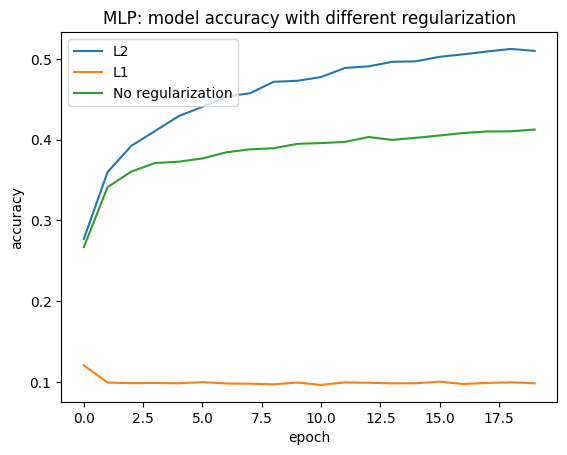

In [38]:
import matplotlib.pyplot as plt
plt.plot(history_dense_0.history['accuracy'])
plt.plot(history_dense_1.history['accuracy'])
plt.plot(history_dense_2.history['accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['L2', 'L1', 'No regularization'], loc='upper left')
plt.show()

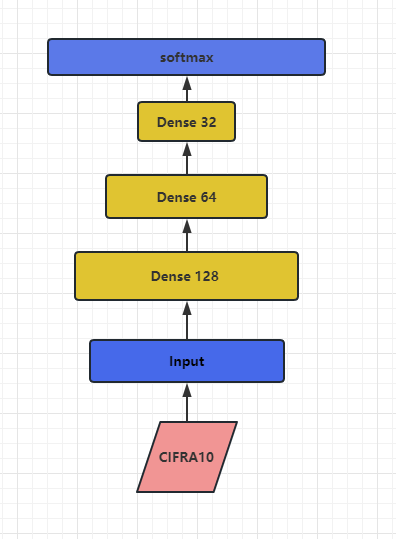

# Dropout test

In [34]:
model_dense_2_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer =tf.keras.regularizers.l2(l=0.01)),
    tf.keras.layers.Dropout(0.1,noise_shape=None,seed=None),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [35]:
model_dense_2_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
steps_per_epoch = train_images.shape[0]/batch_size

In [36]:
history_dense_2_drop = model_dense_2_drop.fit(dataset, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
196/195 [==============================] - 3s 15ms/step - loss: 3.0745 - accuracy: 0.2199
Epoch 2/20
196/195 [==============================] - 3s 15ms/step - loss: 2.1698 - accuracy: 0.2923
Epoch 3/20
196/195 [==============================] - 3s 15ms/step - loss: 2.0678 - accuracy: 0.3118
Epoch 4/20
196/195 [==============================] - 3s 15ms/step - loss: 2.0245 - accuracy: 0.3220
Epoch 5/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9880 - accuracy: 0.3280
Epoch 6/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9792 - accuracy: 0.3315
Epoch 7/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9620 - accuracy: 0.3322
Epoch 8/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9510 - accuracy: 0.3388
Epoch 9/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9320 - accuracy: 0.3450
Epoch 10/20
196/195 [==============================] - 3s 15ms/step - loss: 1.9289 - accura

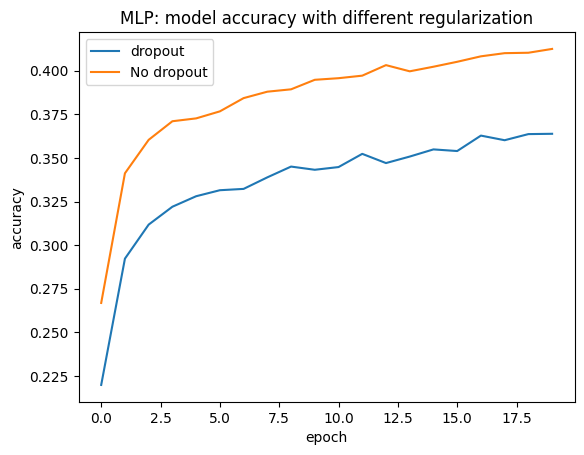

In [39]:
import matplotlib.pyplot as plt
plt.plot(history_dense_2_drop.history['accuracy'])
plt.plot(history_dense_2.history['accuracy'])
plt.title('MLP: model accuracy with different regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout', 'No dropout'], loc='upper left')
plt.show()